<a href="https://colab.research.google.com/github/Ratchadakorn26/Data-Warehouse-and-Big-Data-Analytics-66/blob/main/Project1_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1.  นางสาวธิติพร หิงพุดซา  643021267-3   thitiphorn.h@kkumail.com
2.  นางสาวศดานันท์ ทรัพย์มีมหาศาล   643021272-0 sadanan.su@kkumail.com
3.  นางสาวอิงอร  พลพาล  643021279-6  aingon.p@kkumail.com
4.  นางสาวรัตชฎากร  นามวงศ์  643020517-1  ratchadakorn.n@kkumail.com
5.  นางสาวสุนิสา  อุดมขันธ์  643021278-8  sunisa.u@kkumail.com

**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [3]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request
import spacy
from spacy import displacy
from spacy.pipeline.textcat_multilabel  import DEFAULT_MULTI_TEXTCAT_MODEL
from spacy.pipeline.textcat  import DEFAULT_SINGLE_TEXTCAT_MODEL
from spacy.training import Example
import random
import numpy as np
import pandas as pd
import plotly.express as px
#import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix , f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import LinearSVC
#nltk downloads
import nltk
nltk.download(['punkt', 'wordnet', 'omw-1.4', 'stopwords'])
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import string
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

#### Read JSON file

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# read the file
file = open('/content/drive/MyDrive/Classroom/Data Warehouse and Big Data Analytics 66/thailand_tweets.txt')
thailand = file.read()
thai= json.loads(thailand)
thai

'{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography \\n@tombraider\\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider"

In [7]:
thai_json = json.loads(thai)

In [8]:
print(type(thai_json))

<class 'dict'>


In [9]:
first_tweet=list(thai_json.keys())[0]

#### Pretty print json/dict object

Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

In [10]:
df = pd.read_json(StringIO(thai), orient='index')
df


,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
2019-08-02 16:47:25.825458181,1564764445825458176,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30 23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
2019-08-02 16:46:01.742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30 23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
2019-08-02 16:44:34.098323456,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30 23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
2019-08-02 16:40:28.014313472,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30 23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
2019-08-02 16:38:27.700531202,1564763907700531200,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30 23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


### Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [11]:
# ----------------- Your code here -----------------

#The total number of tweets collected in the file:
Total_number = df['tweet_id'].count()
print(f'The total number of tweets collected in the file:{Total_number}')

The total number of tweets collected in the file:29


In [12]:
#The content of the first tweet:
First_content = df['content'][0]
First_content

'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. '

In [13]:
#Is the first tweet contained any hashtags or mentions?
Hashtags = df['hashtags'][0]
Mentions = df['mentions'][0]
print(f'Hashtags:{Hashtags}')
print(f'Mentions:{Mentions}')

Hashtags:[]
Mentions:[]


In [14]:
#Collect all hashtags related to Thailand from this data
All_hashtags = [df['hashtags'][2],df['hashtags'][5],df['hashtags'][11],df['hashtags'][12],df['hashtags'][19],df['hashtags'][25]]
All_hashtags

[['thailand', 'pattaya'],
 ['4', 'ohmpawat', 'ย'],
 ['pattaya', 'Thailand'],
 ['SDA2022', 'voteforppkritt', 'ppkritt'],
 ['LISA', 'LALISA', 'Money'],
 ['เปกผล', 'PeckPaLitChoke']]

In [15]:
#Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
# You are free to define your own popularity metric
Popular = df[['username','name','content','likes']]
Popular['likes'].max()


143

In [16]:
Popular[Popular['likes']==143]

,username,name,content,likes
2019-08-02 16:47:25.825458181,OhmPawatInter,OhmPawat International,Trend twitter update \n\nTop Twitter influence...,143


In [17]:
#Display the top 5 tweets that are the most popular among your collection
Top_5 = Popular.head(5)
Top_5

,username,name,content,likes
2019-08-02 16:54:53.038882816,matthunter,MATT HUNTΞR,"Thanks for asking! Yes, we will support shippi...",7
2019-08-02 16:54:26.598080513,DavSmithVP,DavSmith / Virtual Photography,Tomb Raider Underworld | Thailand \n#VirtualPh...,2
2019-08-02 16:54:05.685280772,DailyPattaya,The Pattaya Daily,The latest The Pattaya Daily! http://thepattay...,0
2019-08-02 16:51:50.804897792,Bryan62766077,Bryan,"You can live some places for next to nothing, ...",1
2019-08-02 16:47:48.277612549,Megan_and_Grrr,Megan,"ALIEN HOUSE is a story of love, hope and alien...",0


In [18]:
#Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

#เตรียมtext ก่อน   ทำคอนเท้นมารวมกันในคอนเท้นเดียว(ใช้ for หรือ join หรือ + กันก็ได้) แล้วใส่ฟังก์ชัน word cloud
# "".join(list)


Create a word cloud of words in the contents


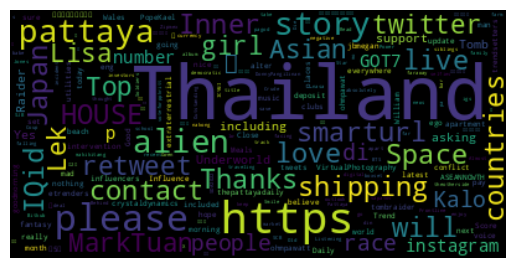

In [23]:
#Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

contents = " ".join([thai_json[key]['content'] for key in thai_json.keys()])
my_stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=my_stopwords).generate(contents)
print('Create a word cloud of words in the contents')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

In [55]:
reviews = pd.read_csv('/content/drive/MyDrive/Classroom/Data Warehouse and Big Data Analytics 66/tripadvisor_hotel_reviews.csv')
reviews

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [56]:
positive_reviews = reviews[reviews['Rating']>3]
neural_reviews = reviews[reviews['Rating']==3]
negative_reviews = reviews[reviews['Rating']<3]

In [57]:
def rate(Score):
  if reviews_negative < 3:
    return 'Negative'
  elif reviews_nueral == 3:
    return 'Nueral'
  elif reviews_positive > 3:
    return 'Positive'

reviews['Rating'] = reviews['Rating'].apply(Score)
reviews

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Nueral
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",Positive
20487,great location price view hotel great quick pl...,Positive
20488,"ok just looks nice modern outside, desk staff ...",Negative
20489,hotel theft ruined vacation hotel opened sept ...,Negative


In [58]:
# combine tweet texts in each type
positive_reviews['sentiment'] = 'positive'
positive_reviews['num'] = range(len(positive_reviews))
neural_reviews['sentiment'] = 'neural'
neural_reviews['num'] = range(len(neural_reviews))
negative_reviews['sentiment'] = 'negative'
negative_reviews['num'] = range(len(negative_reviews))
positive_reviews_combine = " ".join([positive_reviews.iloc[key,0] for key in positive_reviews['num']])
neural_reviews_combine = " ".join([neural_reviews.iloc[key,0] for key in neural_reviews['num']])
negative_reviews_combine = " ".join([negative_reviews.iloc[key,0] for key in negative_reviews['num']])
datacon = pd.concat([positive_reviews,neural_reviews,negative_reviews])

<ipython-input-58-d018cebbb614>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['sentiment'] = 'positive'
<ipython-input-58-d018cebbb614>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['num'] = range(len(positive_reviews))
<ipython-input-58-d018cebbb614>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [59]:
# tokenize texts
P_tokens_ = [t for t in positive_reviews_combine.split()]
NR_tokens = [t for t in neural_reviews_combine.split()]
NG_tokens = [t for t in negative_reviews_combine.split()]


In [ ]:
#----------------------------------------------
# Your code starts here
# label each tweet as positive, negative, and neural sentiment
# combine tweet texts in each type
# tokenize texts
# convert to lower case
# remove stop words
# remove any other stop words, like RT
# remove punctuations
# remove other symbols?
# analyze word frequency in each sentiment type and so on
# create some data visualization for the analysis and your presentation


# คลีนข้อมูลออกมาก่อน  ทำTFIDFก็ได้  เอา positive มาสร้างเป็น metrix ได้ สร้างเป็นโมเดล โลจิตส์ติกรีเกรสชั่น


### Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)

## Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

In [ ]:
#----------------------------------------------
# Your code starts here


#ต้อมาคลีน html ก่อน เพราะurl ที่ดึงมาเป็น html



### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)

# ☃️ The End of Project 1 ☃️